<a href="https://colab.research.google.com/github/Sandeshhegde-371/IRIS-Flower-Classification/blob/main/IRIS_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Import all the necessary Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [19]:
#Load the Iris dataset
df=pd.read_csv("IRIS.csv")

In [20]:
#Data Exploration
print("Dataset Head:\n", df.head())
print("\nSummary:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Summary:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values:
 se

In [21]:
#Data Preprocessing
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [22]:
#Splitting dataset into features and target
X = df.drop('species', axis=1)
y = df['species']

In [23]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [29]:
best_model=None
best_accuracy=0
accuracies={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
print(f"Best Model: {best_model}")

Random Forest Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Accuracy: 0.9667
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

SVM Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  

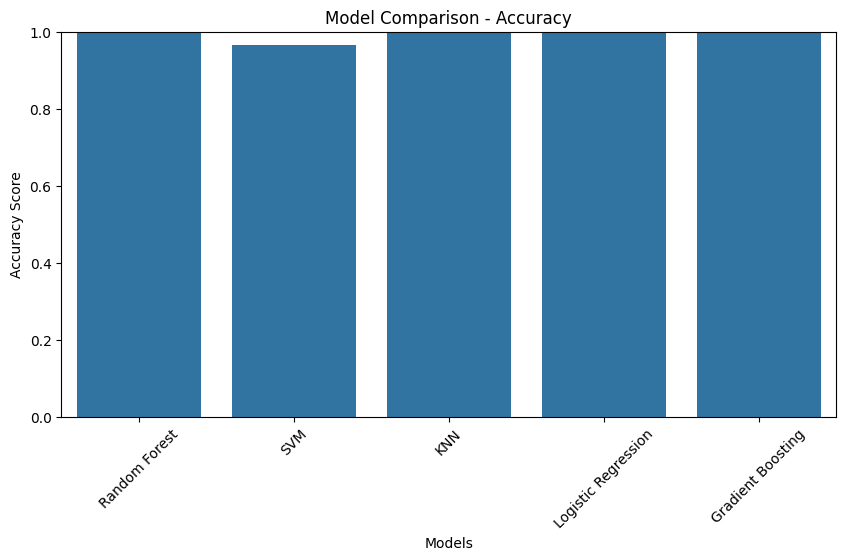

In [30]:
#Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [31]:
#Save Best Model and Scaler
os.makedirs('models', exist_ok=True)
joblib.dump(best_model, 'models/best_iris_model.pkl')
joblib.dump(scaler, 'models/iris_scaler.pkl')
joblib.dump(label_encoder, 'models/iris_label_encoder.pkl')

['models/iris_label_encoder.pkl']